# 이미지를 정사각형으로 만들기

## 주요 방법 
1. Crop
2. Squash (Warp)
3. Padding

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize

In [2]:
cat_img = image.load_img('cat.jpg')
cat_vector = np.asarray(image.img_to_array(cat_img))
cat_vector = cat_vector/255

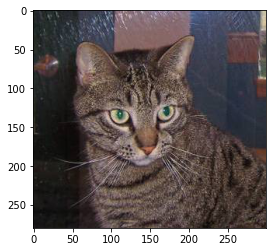

In [4]:
plt.imshow(cat_vector)
# plt.show()

In [5]:
cat_vector.shape

(280, 300, 3)

## Padding

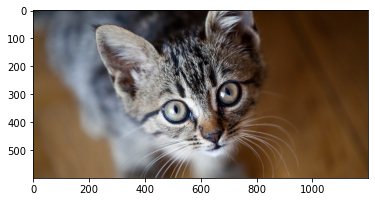

In [5]:
cat_img = image.load_img('cat1.png')
cat_vector = np.asarray(image.img_to_array(cat_img))
cat_vector = cat_vector/255
plt.imshow(cat_vector)

In [6]:
cat_vector.shape

(600, 1200, 3)

In [7]:
target_height = 1200
target_width = 1200

source_height = cat_vector.shape[0]
source_width = cat_vector.shape[1]

cat_vector_pad = pad_to_bounding_box(cat_vector, int((target_height-source_height)/2),int((target_width-source_width)/2),
                               target_height, target_width)

In [8]:
cat_vector_pad.shape

TensorShape([1200, 1200, 3])

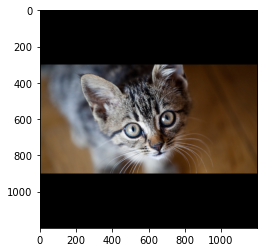

In [9]:
plt.imshow(cat_vector_pad)
plt.show()

In [11]:
image.save_img('cat1_pad.png', cat_vector_pad)

## Cropping

이미지의 가운데를 중심으로 crop 하기

In [10]:
cat_vector_crop = central_crop(cat_vector, .5) # 원본 이미지의 50%만을 crop (가운데를 중심으로)

In [11]:
cat_vector_crop.shape

TensorShape([140, 150, 3])

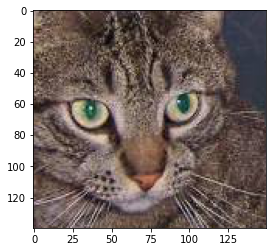

In [12]:
plt.imshow(cat_vector_crop)
plt.show()

Crop and resize

In [13]:
BATCH_SIZE = 1
NUM_BOXES = 5
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
CHANNELS = 3
CROP_SIZE = (100, 100)

boxes = tf.random.uniform(shape=(1, 4))
box_indices = tf.random.uniform(shape=(1,), minval=0, maxval=BATCH_SIZE, dtype=tf.int32)
output = tf.image.crop_and_resize([cat_vector], boxes, box_indices, CROP_SIZE)

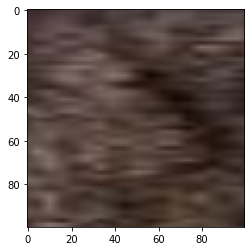

In [19]:
plt.imshow(output[0])
# plt.show()

또 다른 방법

300 280 10 0 280


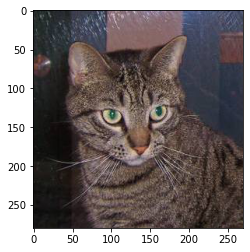

In [15]:
from PIL import Image
img = Image.open('cat.jpg')
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
print(w, h, x, y, s)
img = img.crop((x, y, s, s))
# 4-tuple defining the left, upper, right, and lower pixel coordinate
plt.imshow(np.asarray(img))

## Resize

In [17]:
cat_vector_resize = resize(cat_vector, (400,400))

In [18]:
cat_vector_resize.shape

TensorShape([400, 400, 3])

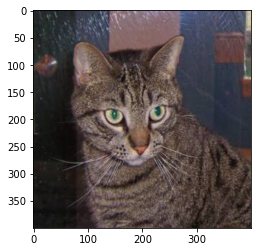

In [22]:
plt.imshow(cat_vector_resize)

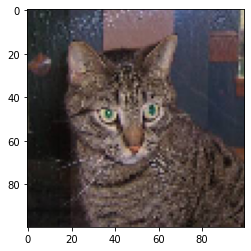

In [23]:
cat_vector_resize1 = resize(cat_vector, (100,100))
plt.imshow(cat_vector_resize1)

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
example = x_train[0]

In [9]:
example.shape

(28, 28, 1)

In [8]:
example = example.reshape(28,28,1)

In [10]:
from tensorflow.image import resize_with_pad

In [12]:
example1 = resize_with_pad(example, 227, 227)

In [14]:
example1.shape

TensorShape([227, 227, 1])

In [18]:
import numpy as np

In [23]:
example2=np.array(example1)

In [15]:
import matplotlib.pyplot as plt

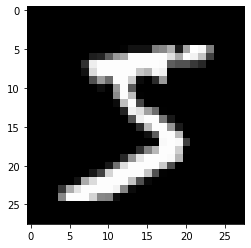

In [16]:
plt.imshow(example, cmap='gray') # cmap='gray', vmin=0, vmax=255
plt.show()

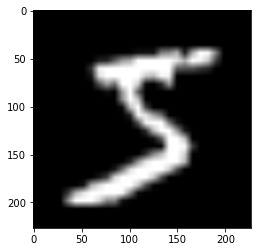

In [24]:
plt.imshow(example2, cmap='gray') # cmap='gray', vmin=0, vmax=255
plt.show()

In [27]:
x = np.array([[[1., 2., 3.],
      [4., 5., 6.]],
      [[7., 8., 9.],
      [10., 11., 12.]]])

In [28]:
x.shape

(2, 2, 3)

In [29]:
from tensorflow.image import pad_to_bounding_box

In [40]:
example3 = pad_to_bounding_box(example, 100,100, 228,228)
# 100 = (228-28)/2

In [38]:
example3.shape

TensorShape([228, 228, 1])

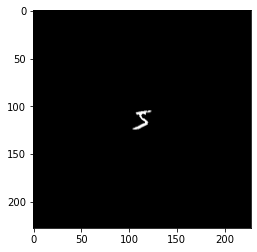

In [39]:
plt.imshow(example3, cmap='gray') # cmap='gray', vmin=0, vmax=255
plt.show()

In [41]:
from tensorflow.image import central_crop

In [42]:
example4 = central_crop(example, .5)

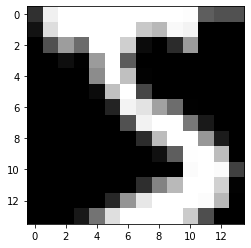

In [43]:
plt.imshow(example4, cmap='gray') # cmap='gray', vmin=0, vmax=255
plt.show()

In [44]:
from tensorflow.keras.preprocessing import image

In [45]:
cat_img = image.load_img('cat.jpg')

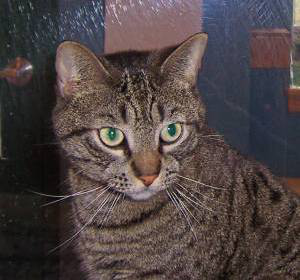

In [46]:
cat_img

In [47]:
cat_vector = np.asarray(image.img_to_array(cat_img))

In [48]:
cat_vector.shape

(280, 300, 3)

In [51]:
cat_vector = cat_vector/255

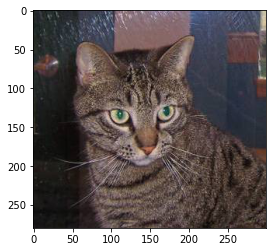

In [52]:
plt.imshow(cat_vector)
plt.show()

In [54]:
cat_vector.shape[0]

280

In [55]:
target_height = 400
target_width = 380

source_height = cat_vector.shape[0]
source_width = cat_vector.shape[1]

In [59]:
(target_height-source_height)/2

60.0

In [60]:
cat_vector_pad = pad_to_bounding_box(cat_vector, int((target_height-source_height)/2),int((target_width-source_width)/2),
                               target_height, target_width)
# 100 = (228-28)/2

In [61]:
cat_vector_pad.shape

TensorShape([400, 380, 3])

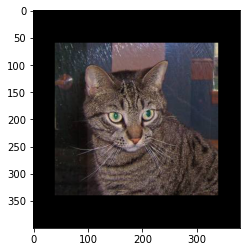

In [62]:
plt.imshow(cat_vector_pad)
plt.show()

In [71]:
BATCH_SIZE = 1
NUM_BOXES = 5
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
CHANNELS = 3
CROP_SIZE = (100, 100)

boxes = tf.random.uniform(shape=(1, 4))
box_indices = tf.random.uniform(shape=(1,), minval=0, maxval=BATCH_SIZE, dtype=tf.int32)
output = tf.image.crop_and_resize([cat_vector], boxes, box_indices, CROP_SIZE)

In [72]:
output.shape

TensorShape([1, 100, 100, 3])

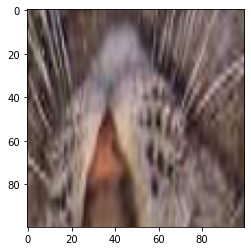

In [73]:
plt.imshow(output[0])
plt.show()